#COVID
<font color='orange'>**If you attended the class in person, please don't forget to fill in [this form](https://docs.google.com/forms/d/e/1FAIpQLSfA7p1lxOhaXLw_2jO1OBvOzqheS0kjzm968S4uciXQKh5__g/viewform)**

# Introduction to Deep Learning

Please, make a copy of this colaboratory in order to be able to make changes **(File -> Save a copy in Drive)**.

## Homework #3

This colaboratory also contains Homework #3 of the Machine Learning course, which is due **October 18, midnight (23:59 EET time)**. To complete the homework, extract **(File -> Download .ipynb)** and submit to the course webpage.

**NB! Links to your colaboratory will not be accepted as a solution!**

<font color='red'>**Please, make sure to run your code before submitting the file! (we are not going to do it)**

In [1]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

Here we will define few functions that will help us visualise classifiers that we are going to build in this class. Don't worry if you don't understand this code completely.

In [2]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# for very shallow models
def plot_classifier(X, y, W, b):
  h = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
  Z = np.argmax(Z, axis=1)
  Z = Z.reshape(xx.shape)
  fig = plt.figure()
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=120, edgecolors = 'white', cmap=plt.cm.Spectral)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

# for two-layer network 
def plot_neural_network(X, y, W,b ,W2, b2):
  h = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
  Z = np.argmax(Z, axis=1)
  Z = Z.reshape(xx.shape)
  fig = plt.figure()
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=120, edgecolors = 'white', cmap=plt.cm.Spectral)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

## Let's generate some 2D data like in the lecture

In [3]:
N = 100 # number of points per class
D = 2 # number of features (dimensions)
K = 2 # number of classes (purple and red circles)
X = np.zeros((N*K,D)) # data matrix (each row = single example)
num_examples = X.shape[0]
y = np.zeros(N*K, dtype='int') # class labels

In [4]:
# Creating spiral data points
np.random.random(1111)

for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

Lets visualize newly generated data:

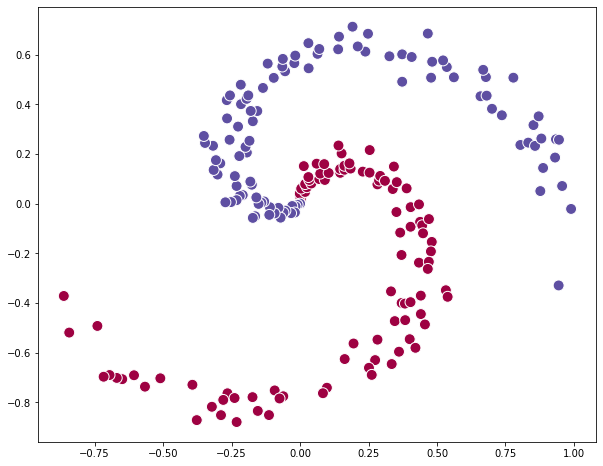

In [5]:
# this is matplotlib...
plt.scatter(X[:, 0], X[:, 1], c=y, s=120, edgecolors = 'white', cmap=plt.cm.Spectral)
plt.show()

For our implementation we would need to transform the vector of correct labels `y` into one hot encoded matrix, let's call it `truth`.

In [6]:
# current labels:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


creating `truth` as one-hot encoded labels (`y`)

In [7]:
# initialize the truth
truth = np.zeros((len(y), K))

# if K == 2, 
# first column is for red
# second is for purple class

# class 0 i.e. red
truth[y == 0, 0] = 1

# class 1 i.e. purple
truth[y == 1, 1] = 1

In [8]:
print(truth[:50,])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


The first five points are red

In [9]:
print(truth[-5:,])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


##Step by step training two artificial neurons
Here we create one neuron per each class, with biases, but **without activation function**.

In [10]:
np.random.seed(1111)
# initialize weights randomly and bias to be zero
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

### Feed-forward path

Compute the predictions by multiplying inputs with weights and adding biases. 

There are two competing functions for multiplying matrices: `np.matmul` and `np.dot`, there are [two important differences](https://stackoverflow.com/questions/34142485/difference-between-numpy-dot-and-python-3-5-matrix-multiplication) between the two, but for our purposes, they are equivalent.

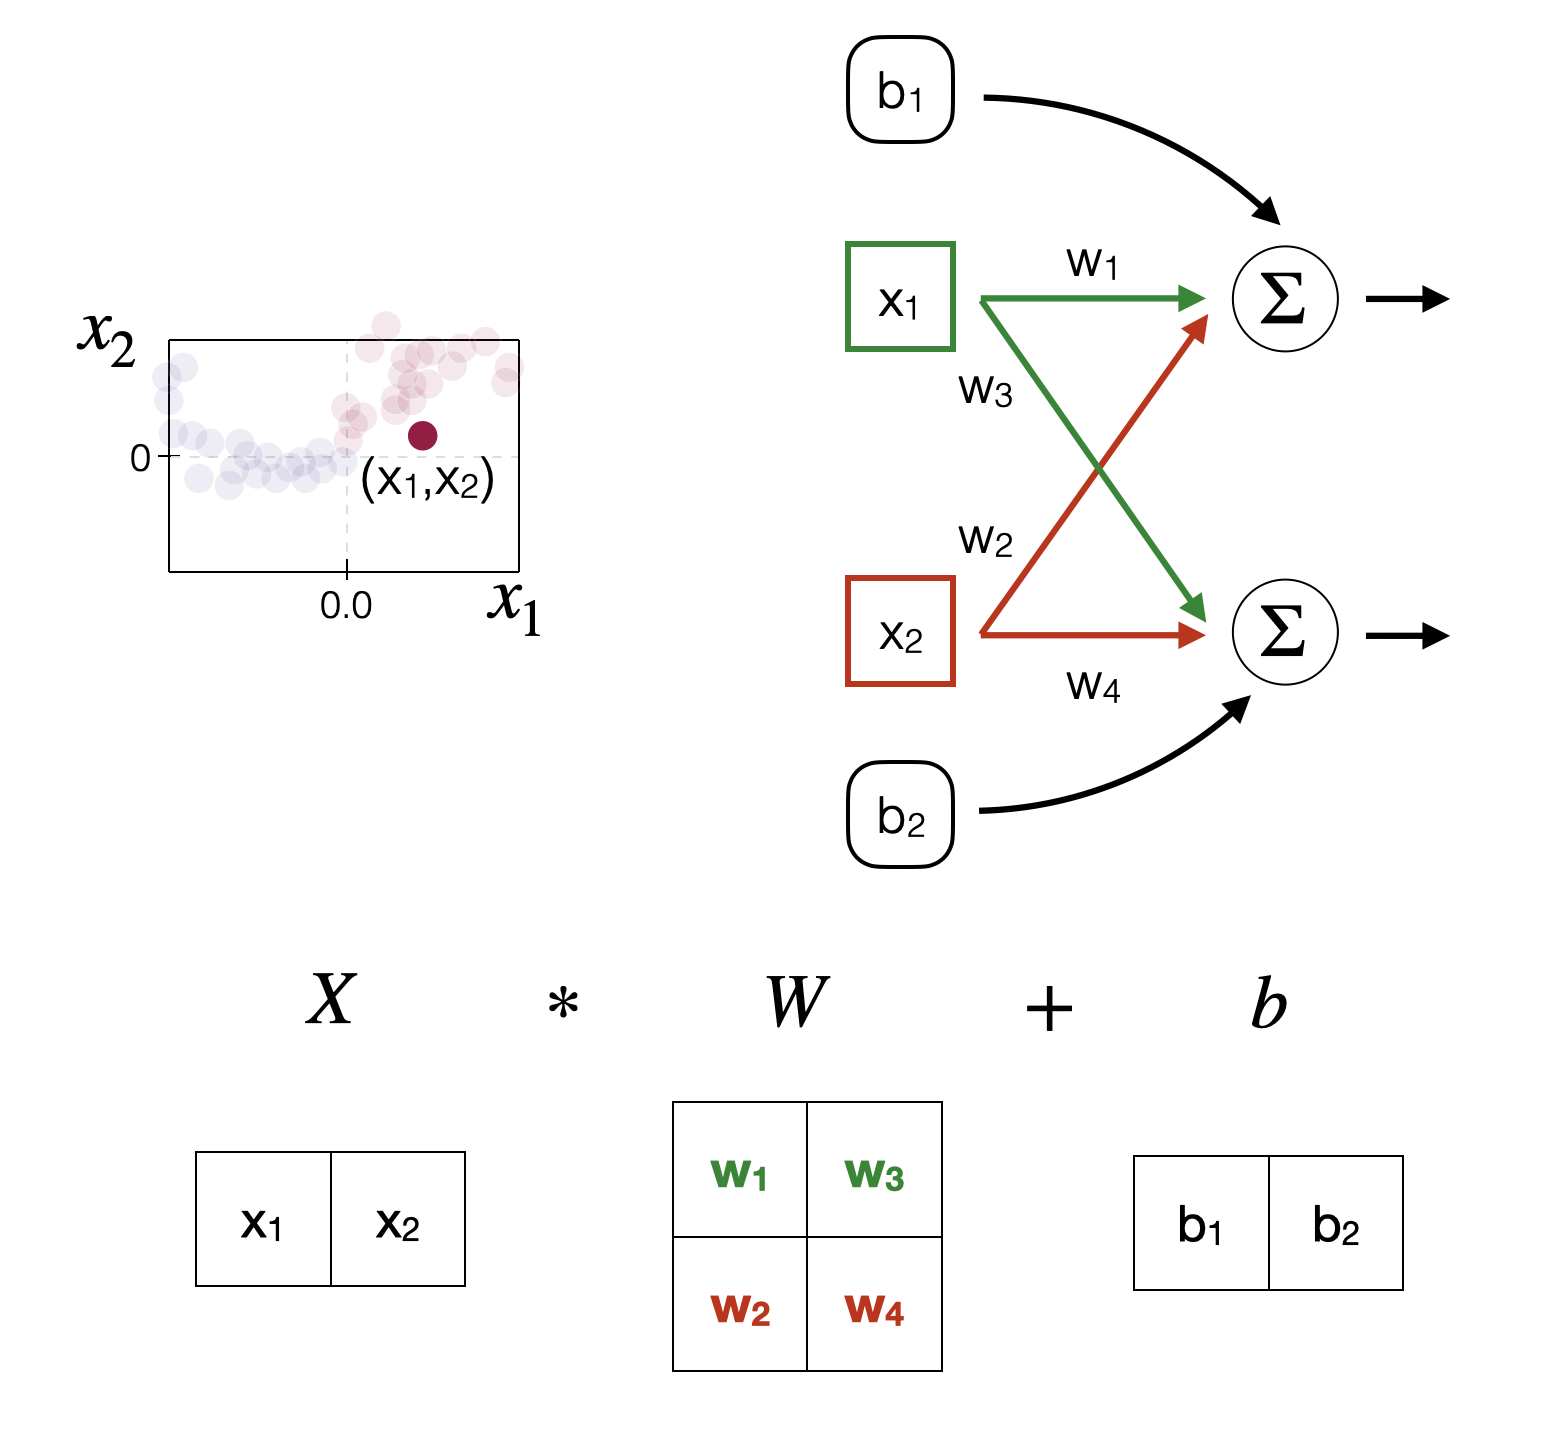

In [11]:
##### YOUR CODE STARTS #####
predictions = np.dot(X, W) + b
##### YOUR CODE ENDS ##### (please do not delete this line)

In [12]:
print(f'{X.shape} x {W.shape} = ({X.shape[0]},{W.shape[1]})')

(200, 2) x (2, 2) = (200,2)


In [13]:
print(np.dot(X, W).shape)

(200, 2)


In [14]:
b.shape

(1, 2)

In [15]:
print(np.round(predictions[-5:], 5))

[[-0.01188 -0.01089]
 [-0.0101  -0.0123 ]
 [-0.01026 -0.0124 ]
 [-0.01304 -0.01043]
 [-0.01488 -0.00724]]


As we now have the predictions, let's compute the **total error**. Here we will use the same mean squared error (MSE) as in the lecture.

In [16]:
total_error = 1/2 * np.sum((truth - predictions)**2)
total_error =  total_error/num_examples # to complete the MSE
print("Total error: {0}".format(total_error))

Total error: 0.5037280402422951


Let's plot the result of our classification. The colour of the background represents `predictions` and colour of points reflects the true classes (`truth`).

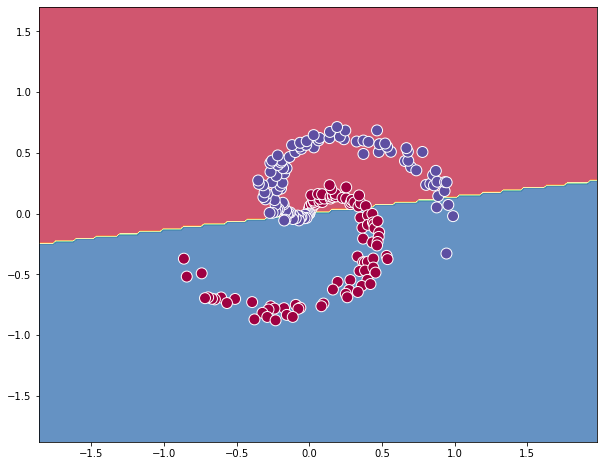

In [17]:
plot_classifier(X, y, W, b)

### Backpropagation

Now, as we have calculated the total error, we can proceed to minimize it via gradient descent.

<center><font size = 6>$\frac{\partial{E_{total}}}{\partial{W}} = \frac{\partial{E_{total}}}{\partial{P}}\frac{\partial{P}}{\partial{W}}$


We have to calculate the gradient with respect to all changable parameters in our simple model, namely **W** and **b**. Let's start by computing the gradient with respect to predictions. Remind yourselves that `total_error = 1/2 * np.sum((truth - predictions)**2)` and `total_error =  total_error/num_examples`, if we want to find `d(total_error)/d(predictions)`. We will use `dTEdP` to denote this derivative.

<center><font size = 4>$E_{total} = \frac{1}{2}(truth - predictions)^2$

<center><font size = 4>$\frac{\partial{E_{total}}}{\partial{P}} = \frac{1}{2}(truth - predictions)\cdot2\cdot(-1)$

We should be using **`dTE/dP`** notation as in the lecture slides, but since this is not a valid variable, we will use **`dTEdP`**.

In [18]:
##### YOUR CODE STARTS #####
dTEdP = predictions - truth
##### YOUR CODE ENDS ##### (please do not delete this line)
dTEdP /= num_examples

Lastly, recall that `predictions = np.dot(X, W) + b` (i.e. which is the same as to say `X * W +b` just in matrix notation) and calculate partial derivatives `d(predictions)/d(weights)` and `d(predictions)/d(biases)`, which will be denoted by `dPdW` and `dPdb` respectively.

<center><font size = 5>$\frac{\partial{P}}{\partial{W}} = \frac{\partial{(X \times W + b)}}{\partial{W}}$

<center><font size = 5>$\frac{\partial{P}}{\partial{b}} = \frac{\partial{(X \times W + b)}}{\partial{b}}$

In [19]:
##### YOUR CODE STARTS #####
dPdW = X
dPdb = 1
##### YOUR CODE ENDS ##### (please do not delete this line)

Recall the chain rule and use gradient on predictions (stored in `dTEdP`), to calculate the gradient with respect to **`W`** and **`b`**. 

Here **`dW`** is actually **`dTEdW`**, but I used **`dW`** just to make it shorter.

Recall that **`dTE/dW = dTE/dP * dP/dW`**, same for biases, **`dTE/db = dTE/dP * dP/db`**

In [20]:
dTEdP.shape

(200, 2)

In [21]:
dPdW.shape

(200, 2)

In [22]:
dW = np.dot(dPdW.T, dTEdP)
db = np.sum(dTEdP, axis = 0, keepdims=True)

In [23]:
print(f"Updates for W and b are {np.round(dW, 3)} and {np.round(db,3)}")

Updates for W and b are [[-0.05  -0.07 ]
 [ 0.139 -0.145]] and [[-0.501 -0.501]]


Update old **`W`** and **`b`** using calculated **`dW`** and **`db`**.

<center><font size = 4>$W_{new} = W_{old} - \eta\cdot \frac{\partial{E_{total}}}{\partial{W}}$
<center><font size = 4>$b_{new} = b_{old} - \eta\cdot \frac{\partial{E_{total}}}{\partial{b}}$

In [24]:
# perform a parameter update
learning_rate = 1

##### YOUR CODE STARTS #####
W = W - learning_rate*dW
b = b - learning_rate*db
##### YOUR CODE ENDS ##### (please do not delete this line)

New decision boundary now looks as follows:

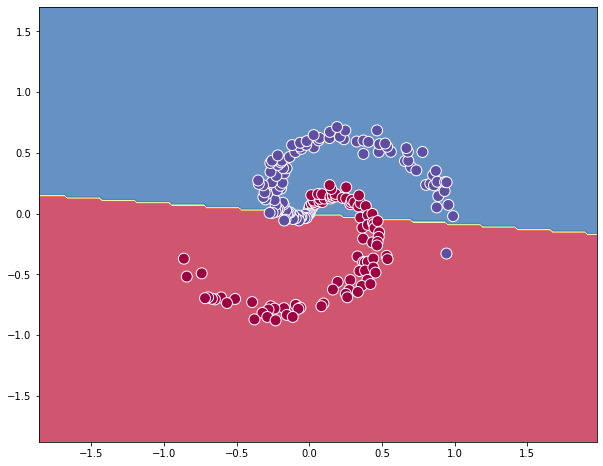

In [25]:
plot_classifier(X, y, W, b)

##Putting this all together: Training a linear classifier

In [26]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
learning_rate = 1

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):
  
  ##### YOUR CODE STARTS #####

  # evaluate predictions, [N x K]
  predictions = np.dot(X, W) + b
  
  # compute the error: average sum of squared differences
  total_error = np.sum((truth - predictions)**2)/2
  total_error = total_error/num_examples # we need to normalise the error over all examples, to keep things stable

  if i % 10 == 0:
    print("iteration %d: loss %e" % (i, total_error))
  
  # compute the gradient on predictions
  dTEdP = predictions - truth
  dTEdP /= num_examples

  # compute the gradient on weights and biases
  dPdW = X
  dPdb = 1

  # complete backpropatation path to the parameters (W,b)
  dW = np.dot(dPdW.T,dTEdP)
  db = np.sum(dTEdP, axis = 0, keepdims = True)
  
  # perform a parameter update
  W = W - learning_rate*dW
  b = b - learning_rate*db
  ##### YOUR CODE ENDS ##### (please do not delete this line)

iteration 0: loss 5.010886e-01
iteration 10: loss 1.381379e-01
iteration 20: loss 1.339165e-01
iteration 30: loss 1.336175e-01
iteration 40: loss 1.335928e-01
iteration 50: loss 1.335907e-01
iteration 60: loss 1.335905e-01
iteration 70: loss 1.335905e-01
iteration 80: loss 1.335905e-01
iteration 90: loss 1.335905e-01
iteration 100: loss 1.335905e-01
iteration 110: loss 1.335905e-01
iteration 120: loss 1.335905e-01
iteration 130: loss 1.335905e-01
iteration 140: loss 1.335905e-01
iteration 150: loss 1.335905e-01
iteration 160: loss 1.335905e-01
iteration 170: loss 1.335905e-01
iteration 180: loss 1.335905e-01
iteration 190: loss 1.335905e-01


In [27]:
# evaluate the final accuracy
predictions = np.dot(X, W) + b
predicted_class = np.argmax(predictions, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.74


This should produce something like ~**77%**. Not very good at all, but also not surprising given that the dataset is constructed so it is not linearly separable. We can also plot the learned decision boundaries. Btw, see if you can interpret this plot.

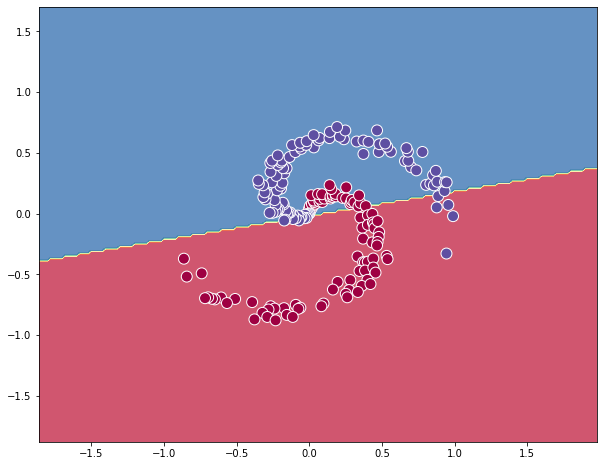

In [28]:
plot_classifier(X, y, W, b)

##Training a simple Neural Network

Clearly, one layer is not enough for this dataset and we would like to use a **deeper neural network**. One additional hidden layer will suffice for this toy data. We will now need two sets of weights and biases (for the first and second layers).

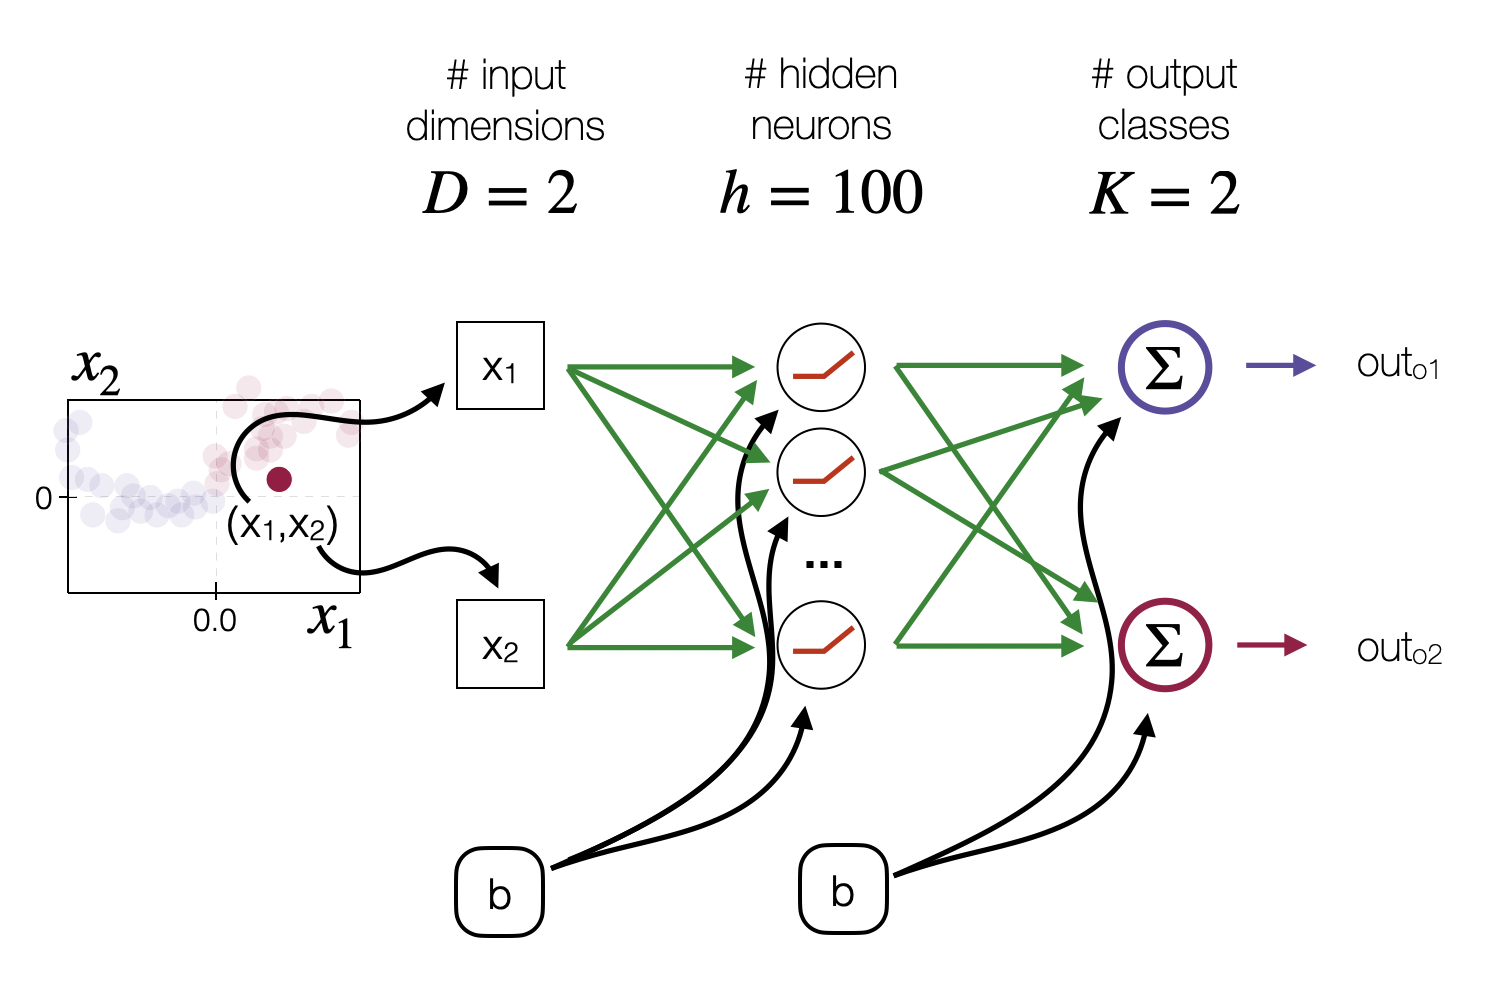

In [29]:
np.random.seed(1111)

# initialize parameters randomly
h = 100 # number of neurons in the hidden layer

# first hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))

### Feed-forward path

Let's calculate the input to the hidden layer

In [30]:
hidden_layer = np.dot(X, W) + b

In [31]:
hidden_layer.shape

(200, 100)

In this network we will use activation function (ReLu), which thresholds the activations in the hidden layer at zero.

In [32]:
hidden_layer = np.maximum(0, hidden_layer) # NB! ReLU activation

What are the dimensions of the second layer? We have 100 neurons in the hidden layer and 2 neurons in the output layer. Therefore we need 100 x 2 connections (weights) between these two layers.

In [33]:
np.random.seed(1111)

# initialize the second (output) layer
W2 = 0.01 * np.random.randn(h,K) 
b2 = np.zeros((1,K))

Let's compute predictions as before but now using a 2-layer (one hidden layer + one output layer) network:

In [34]:
predictions = np.dot(hidden_layer, W2) + b2 # Note, no activation function for the second layer!

In [35]:
predictions[0:5]

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 7.39166278e-06, -3.31409491e-06],
       [ 1.55206795e-05, -5.95583523e-06],
       [ 2.55222945e-05, -5.88724325e-06],
       [ 3.40454292e-05, -7.78620775e-06]])

### Backpropagation

Note, we first compute the hidden layer representation and then the `predictions` using output of the first layer and weights of the second layer. Everything else remains the same. We compute the error based on the predictions exactly as before, and get the gradient for the predictions `dTEdP` exactly as before.

In [36]:
dTEdP = predictions - truth
dTEdP /= num_examples

However, the way we backpropagate that gradient into the model parameters now changes, of course. First lets backpropagate into the second layer of the network.

In [37]:
# predictions = np.dot(hidden_layer, W2) + b2
dPdW2 = hidden_layer
dPdb2 = 1

This looks identical to the code we had for the linear classifier, except we’re replacing `X` (the raw data), with the variable `hidden_layer`:

In [38]:
# first backprop to parameters W2 and b2
dW2 = np.dot(dPdW2.T, dTEdP)
db2 = np.sum(dTEdP, axis = 0, keepdims=True)

However, unlike before we are not yet done, because **`hidden_layer`** is itself a function of other parameters and the data! We need to continue backpropagation through this variable. Remind yourself `predictions = np.dot(hidden_layer, W2) + b2` and now find `dPdH`:



In [39]:
dPdH = W2.T
dH = np.dot(dTEdP, dPdH)

Now we have the gradient on the outputs of the hidden layer. Next, we have to backpropagate the ReLU non-linearity. This turns out to be easy because ReLU during the backward pass is effectively a switch. Since **`r = max(0,x)`**, we have that **`drdx = 1 (if x>0)`**. Therefore, ReLU unit lets the gradient pass through unchanged (multiplied by 1) if its input was greater than 0, but kills it if its input was less than zero during the forward pass. 


Complete code below to backpropagate the ReLU:

In [40]:
# backprop the ReLU non-linearity
dH[hidden_layer <= 0] = 0

And now we finally continue to the first layer weights and biases the same way we did for linear classifier:

In [41]:
# finally into W,b
dW = np.dot(X.T, dH)
db = np.sum(dH, axis=0, keepdims=True)

The full code looks very similar to what we have written before:

In [42]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
learning_rate = 1e-0

# gradient descent loop
num_examples = X.shape[0]
for i in range(2000):
  ##### YOUR CODE STARTS #####

  # evaluate predictions, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  predictions = np.dot(hidden_layer, W2) + b2
  
  # compute the error: average sum of squared differences
  total_error = 1/2 * np.sum((truth - predictions)**2)
  total_error = total_error/num_examples

  if i % 100 == 0:
    print("iteration %d: loss %e" % (i, total_error))
  
  # compute the gradient on predictions
  dTEdP = predictions - truth
  dTEdP /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(dPdW2.T, dTEdP)
  db2 = np.sum(dTEdP, axis = 0, keepdims=True)
  
  # next backprop into hidden layer
  dPdH = W2.T
  dH = np.dot(dTEdP, dPdH)
  
  # backprop the ReLU non-linearity
  dH[hidden_layer <= 0] = 0

  # finally into W,b
  dW = np.dot(X.T, dH)
  db = np.sum(dH, axis=0, keepdims=True)
  
  # perform a parameter update
  W = W - learning_rate*dW
  b = b - learning_rate*db
  W2 = W2 - learning_rate*dW2
  b2 = b2 - learning_rate*db2

  ##### YOUR CODE ENDS ##### (please do not delete this line)

iteration 0: loss 5.001549e-01
iteration 100: loss 1.319528e-01
iteration 200: loss 1.266440e-01
iteration 300: loss 1.234050e-01
iteration 400: loss 1.192188e-01
iteration 500: loss 1.123149e-01
iteration 600: loss 1.043373e-01
iteration 700: loss 9.537249e-02
iteration 800: loss 8.872217e-02
iteration 900: loss 8.359422e-02
iteration 1000: loss 8.050506e-02
iteration 1100: loss 7.867293e-02
iteration 1200: loss 7.769676e-02
iteration 1300: loss 7.714735e-02
iteration 1400: loss 7.684180e-02
iteration 1500: loss 7.660601e-02
iteration 1600: loss 7.639482e-02
iteration 1700: loss 7.613714e-02
iteration 1800: loss 7.561868e-02
iteration 1900: loss 7.525408e-02


In [43]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
predictions = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(predictions, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.86


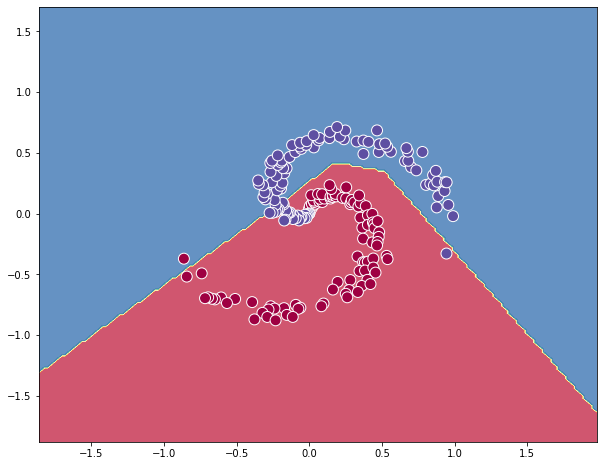

In [44]:
# plot the resulting classifier
plot_neural_network(X, y, W, b, W2, b2)

## Homework exercise 1 (6 points): three-layer network
<font color='red'> Obviously, ~91% is not good enough for us, add one more layer to the network that we have defined before, by filling in the gaps.</font>

<font color='red'> **(Homework exercise 1- a)** Initialise weights and compute the forward path with 2 hidden layers (each with `h` neurons and followed by the ReLu) and one output layer **(1 point)**. </font>

In [ ]:
# initialize parameters randomly
h = 100 # size of hidden layer

# first hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))

# What should be the dimensions of the second layer?
##### YOUR CODE STARTS #####
W2 = 0.01 * np.random.randn(h,h)
b2 = np.zeros((1,h))
##### YOUR CODE ENDS ##### (please do not delete this line)

# the third layer for the class scores (second layer in previous network)
W3 = 0.01 * np.random.randn(h,K) 
b3 = np.zeros((1,K))

In [ ]:
hidden_layer = np.maximum(0, np.dot(X, W) + b) # NB, ReLU activation
print(hidden_layer.shape)

(200, 100)


In [ ]:
##### YOUR CODE STARTS #####
hidden_layer_2 = np.maximum(0, np.dot(hidden_layer, W2) + b2)
##### YOUR CODE ENDS ##### (please do not delete this line)
print(hidden_layer_2.shape)

(200, 100)


In [ ]:
predictions = np.dot(hidden_layer_2, W3) + b3 # Note, no activation function for the second layer!
print(f'the shape of predictions is {predictions.shape}, and it should be (200, 2)')

the shape of predictions is (200, 2), and it should be (200, 2)


Compute the total error as usuall

In [ ]:
total_error = 1/2 * np.sum((truth - predictions)**2)
total_error = total_error/num_examples
print(np.round(total_error, 3))

0.5


<font color='red'> **(Homework exercise 1- b)** Calculate `bW`, `db`, `bW2`, `db2`, `bW3` and `db3` usign backpropagation algorithm. **(2 points)** </font>

In [ ]:
dTEdP = (truth - predictions)*(-1)
dTEdP /= num_examples

In [ ]:
# first backprop to parameters W3 and b3
##### YOUR CODE STARTS #####
dW3 = np.dot(hidden_layer_2.T, dTEdP)
db3 =  np.sum(dTEdP, axis = 0, keepdims=True)
##### YOUR CODE ENDS ##### (please do not delete this line)

In [ ]:
dH2 = np.dot(dTEdP, W3.T)
# ReLu in the second layer
dH2[hidden_layer_2 <= 0] = 0

In [ ]:
# then backprop to parameters W2 and b2
##### YOUR CODE STARTS #####
dW2 = np.dot(hidden_layer.T, dH2)
db2 = np.sum(dH2, axis=0, keepdims=True)
##### YOUR CODE ENDS ##### (please do not delete this line)

In [ ]:
##### YOUR CODE STARTS #####
dH = np.dot(dH2, W2.T)

# ReLu in the first layer
dH[hidden_layer <= 0] = 0
##### YOUR CODE ENDS ##### (please do not delete this line)


In [ ]:
# finally into W,b
##### YOUR CODE STARTS #####
dW = np.dot(X.T, dH)
db = np.sum(dH, axis=0, keepdims=True)
##### YOUR CODE ENDS ##### (please do not delete this line)

<font color='red'> **(Homework exercise 1- c)** Put together code from **(b)** into a single cell below and run the training **(1 point)** </font>

In [ ]:
# initialize parameters randomly
h = 100 # size of hidden layer

# first hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))

# What should be the dimensions of the second layer?
##### YOUR CODE STARTS #####
W2 = 0.01 * np.random.randn(h,h)
b2 = np.zeros((1,h))
##### YOUR CODE ENDS ##### (please do not delete this line)

# the third layer for the class scores (second layer in previous network)
W3 = 0.01 * np.random.randn(h,K) 
b3 = np.zeros((1,K))

# some hyperparameters
learning_rate = 1e-0

# gradient descent loop
num_examples = X.shape[0]
for i in range(2000):
  ##### YOUR CODE STARTS #####

  # forward path
  hidden_layer = np.maximum(0, np.dot(X, W) + b)
  hidden_layer_2 = np.maximum(0, np.dot(hidden_layer, W2) + b2)
  predictions = np.dot(hidden_layer_2, W3) + b3
  
  # compute the error: average sum of squared differences
  total_error = 1/2 * np.sum((truth - predictions)**2)
  total_error = total_error/num_examples

  if i % 100 == 0:
    print("iteration %d: loss %e" % (i, total_error))
  
  # compute the gradient on predictions
  dTEdP = (truth - predictions)*(-1)
  dTEdP /= num_examples
  
  # backpropate the gradient to the parameters

  # first backprop into parameters W3 and b3
  dW3 = np.dot(hidden_layer_2.T, dTEdP)
  db3 =  np.sum(dTEdP, axis = 0, keepdims=True)
  
  dH2 = np.dot(dTEdP, W3.T)
  dH2[hidden_layer_2 <= 0] = 0

  # then backprop into W2 and b2
  dW2 = np.dot(hidden_layer.T, dH2)
  db2 = np.sum(dH2, axis=0, keepdims=True)

  dH = np.dot(dH2, W2.T)
  dH[hidden_layer <= 0] = 0

  # finally into W,b
  dW = np.dot(X.T, dH)
  db = np.sum(dH, axis=0, keepdims=True)
  
  # perform a parameter update
  W = W - learning_rate * dW
  b = b - learning_rate * db
  W2 = W2 - learning_rate * dW2
  b2 = b2 - learning_rate * db2
  W3 = W3 - learning_rate * dW3
  b3 = b3 - learning_rate * db3
  ##### YOUR CODE ENDS ##### (please do not delete this line)

iteration 0: loss 4.999865e-01
iteration 100: loss 1.962935e-01
iteration 200: loss 1.354031e-01
iteration 300: loss 1.363227e-01
iteration 400: loss 8.875501e-02
iteration 500: loss 5.876460e-02
iteration 600: loss 4.765677e-02
iteration 700: loss 4.177969e-02
iteration 800: loss 3.725899e-02
iteration 900: loss 3.317985e-02
iteration 1000: loss 3.172635e-02
iteration 1100: loss 2.970450e-02
iteration 1200: loss 2.835814e-02
iteration 1300: loss 2.686334e-02
iteration 1400: loss 2.409811e-02
iteration 1500: loss 2.345453e-02
iteration 1600: loss 2.126075e-02
iteration 1700: loss 2.100723e-02
iteration 1800: loss 1.985382e-02
iteration 1900: loss 1.908248e-02


In [ ]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
hidden_layer_2 = np.maximum(0, np.dot(hidden_layer, W2) + b2) # NB, ReLU activation
predictions = np.dot(hidden_layer_2, W3) + b3 # Note, no activation function for the second layer!
predicted_class = np.argmax(predictions, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.98


You should get about 98% of accuracy

<font color='red'> **(Homework exercise 1- d)** Make a new function `plot_deep_neural_network` by altering the code of `plot_neural_network` to visualise obtained model with W, W2, W3 and b, b2, b3 **(1 point)** </font>



In [ ]:
def plot_deep_neural_network(X, y, W, b ,W2, b2, W3, b3):
  h = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  
  ##### YOUR CODE STARTS #####
  Z = np.dot(np.maximum(0, np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2), W3) + b3
  ##### YOUR CODE ENDS ##### (please do not delete this line)
  
  Z = np.argmax(Z, axis=1)
  Z = Z.reshape(xx.shape)
  fig = plt.figure()
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=120, edgecolors = 'white', cmap=plt.cm.Spectral)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

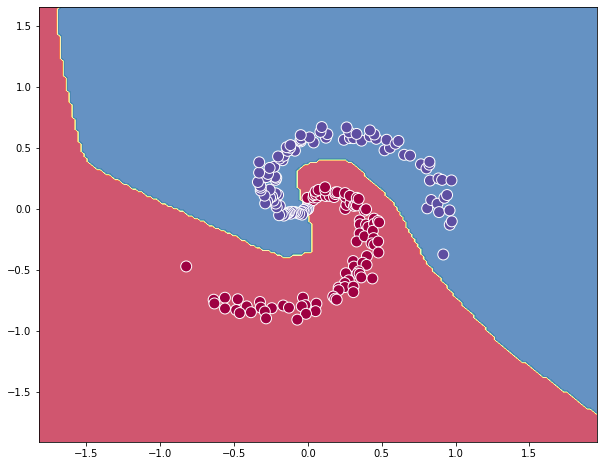

In [ ]:
# plot the resulting classifier
plot_deep_neural_network(X, y, W, b, W2, b2, W3, b3)

<font color='red'> **(Homework exercise 1- e)** Interpret obtained plot and accuracy. Did the classifier become more rigit or more flexible? Why? Did the perofrmance of the 3-layer network improve comparing to 2-layer network? **(1 point)** </font>


Answer to **(e)**: Just by comparing the accuracies and the graphs; we can claim that the more layers we add, the more complex(or flexible) our model becomes.

But if we think about how neural networks work, this conclusion shouldn't come as a surprise. As we increase the number of layers from 2 to 3, our model's ability to learn increases because our classifier becomes more nonlinear at each step, thus capturing the spiral shape above. So in short, the performance of our model increased with the third additional layer compared to the 2-layer network created in the practice session.

As a side note, if the data points were linearly separable, we wouldn't have needed such a complex model to reach a high accuracy. A neural network's main trick is its ability to capture more complexity than compared to any other model in general.

Lastly, we have only worked with a training set in the above example, if we had a test set we would have seen overfitting after a certain number of hidden layers. So increasing the model complexity is good only to a certain point(for example we don't need a 15 layer neural network to separete the two spirals above, a 3 layer network already does the job well enough).

##Using Keras
Of course there is an elephant in the room. Nobody uses pure Python to implement Neural Networks these days. So let's see how the same very simple 2-layer architecture is designed in Keras with way fewer lines of code. 

[Keras](https://keras.io/) is a high-level neural networks constructor, written on top of TensorFlow. Keras has very well designed API, which allows for concise code and flexibility at the same time.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

Here is how you build a 2-layer neural network with 100 neurons in the hiddel layer in Keras:

In [ ]:
h = 100
model = Sequential() # let's us define the network layer by layer
model.add(Dense(h, input_dim=2, activation='relu')) # hidden layer
model.add(Dense(K, activation='sigmoid')) # as many neurons as there are classes

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Run the model
history = model.fit(X, truth, epochs=150, batch_size=10)

Epoch 1/150
20/20 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.7250
Epoch 2/150
20/20 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.7450
Epoch 3/150
20/20 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.7400
Epoch 4/150
20/20 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.7450
Epoch 5/150
20/20 [==============================] - 0s 2ms/step - loss: 0.5214 - accuracy: 0.7450
Epoch 6/150
20/20 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7350
Epoch 7/150
20/20 [==============================] - 0s 2ms/step - loss: 0.4541 - accuracy: 0.7350
Epoch 8/150
20/20 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.7300
Epoch 9/150
20/20 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.7300
Epoch 10/150
20/20 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.7350
Epoch 11/

In [ ]:
# evaluate the model
scores = model.evaluate(X, truth)
print(f"Accuracy is {scores[1]*100}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0678 - accuracy: 0.9850
Accuracy is 98.50000143051147%


(-1.9062562861548171, 1.653743713845186)

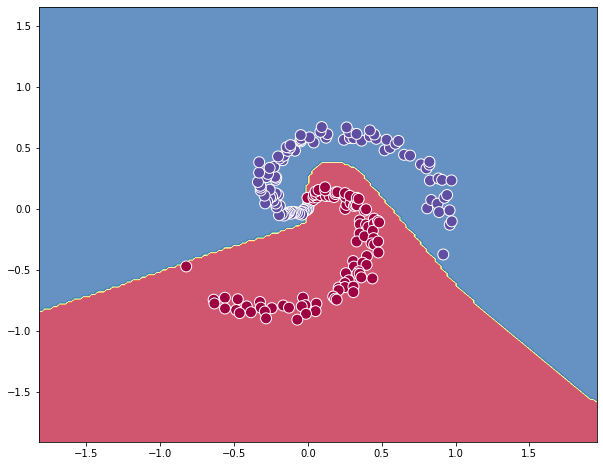

In [ ]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=120, edgecolors = 'white', cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

As we kept records of the learning process in the `history` variable, we now can visualise the dynamics of the training process by plotting loss at different epochs:

Text(0.5, 1.0, 'Loss across epochs')

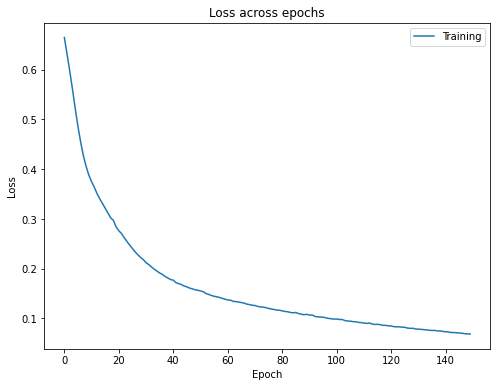

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training'])
plt.title('Loss across epochs')

# Convolutional Neural Networks
## Keras on CIFAR10

In this part of the class, we will examine convolutional neural networks (CNN). As CNNs were designed specifically to work with imaging data,  we will use CIFAR-10 dataset to demonstrate their effectiveness on images. The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60 000 pictures divided into 10 classes (hence the name CIFAR-10). Classes include common objects such as airplanes, automobiles, birds, cats and so on. Our goal is to train a convolutional neural network to classify these images.

The following instructions help to install required dependencies and load the data.

In [ ]:
# old school TF 
# - we do not "learn TF1", we use it just to get to MNIST
%tensorflow_version 1.x

# Supress warnings by TF 1.x
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# A bit of setup again
import numpy as np
import matplotlib.pyplot as plt

# loading in the cifar10 dataset
from keras.datasets import cifar10

# Keras comes with built-in loaders for common datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# shorten dataset for quicker training
X_train = X_train[:25000]
y_train = y_train[:25000]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

TensorFlow 1.x selected.


Using TensorFlow backend.


170500096/170498071 [==============================] - 10s 0us/step
Train data shape:  (25000, 32, 32, 3)
Train labels shape:  (25000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


Let's visualise several random images from each class to get familiar with the data:

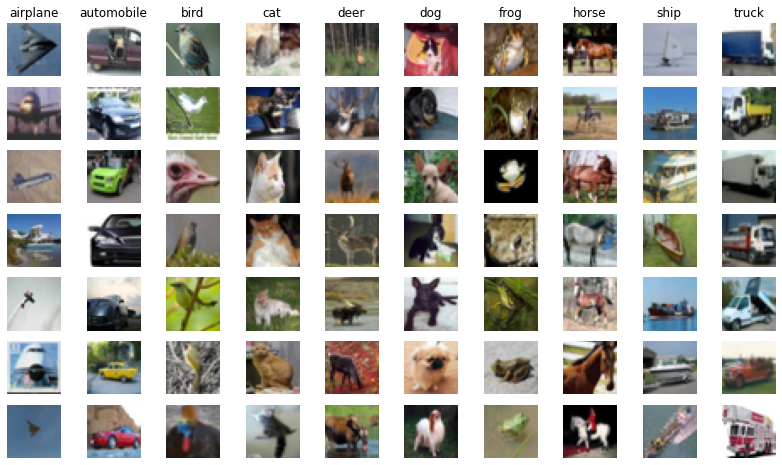

In [ ]:
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
# "Names" of classes:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes = len(class_names)

samples_per_class = 7 # Number of images from each class we want to see
for y, cls in enumerate(class_names):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape((32, 32, 3)), plt.get_cmap('gray'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

Do all images look right? Is there anything unexpected?

Building an effective neural network model requires careful consideration of the network architecture as well as the input data format. What do the 4 dimensions ((50000, 32, 32, 3)) of X_train represent? What values do these data contain and from what range do these values come from?

**Data normalisation step.** Data normalization is an important step which ensures that each input parameter (pixel, in this case) has a similar data distribution. This makes convergence faster while training the network. Data normalization is done by subtracting the mean from each pixel and then dividing the result by the standard deviation [[source](https://becominghuman.ai/image-data-pre-processing-for-neural-networks-498289068258)]. In our case we do it for each RGB component separately.

In [ ]:
mu = X_train.mean(axis=(0,1,2)) # finds mean of R, G and B separately
std = X_train.std(axis=(0,1,2)) # same for std
X_train_norm = (X_train - mu)/std
X_test_norm = (X_test - mu)/std

Now we are ready to define our Convolutional Neural Network model. First we need to specify the layers that we will be using.

Here is the architecture that we shall use:

1. 3x3 convolution with 32 filters, stride 1, padding same
2. batch normalization
3. relu
4. 3x3 convolution with 32 filters, stride 1, padding valid
5. batch normalization
6. relu
7. max pooling 2x2
8. dropout 0.25
7. flatten
8. dense 100
5. batch normalization
6. relu
8. dropout 0.5
8. dense 10
9. softmax

You can consult Keras documentation for layer parameters:
 - [Convolutional layers](https://keras.io/layers/convolutional/)
 - [Pooling layers](https://keras.io/layers/pooling/)
 - [Normalization layers](https://keras.io/layers/normalization/)

Here is how aforementioned architecture can be implemented in Keras. Note the difference in notation with network we defined earlier: here we explicitely specify input and output of each layer.

In [ ]:
%tensorflow_version 1.x
from keras.layers import Input, Conv2D, Activation, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout

x = Input(shape=(32, 32, 3))

#First Convolutional Block
c1 = Conv2D(32, (3, 3), strides=(1, 1), padding="same")(x)
b1 = BatchNormalization()(c1)
a1 = Activation('relu')(b1)

# Second Convolutional Block
c2 = Conv2D(32, (3, 3), strides=(1, 1), padding="valid")(a1)
b2 = BatchNormalization()(c2)
a2 = Activation('relu')(b2)
p2 = MaxPooling2D(pool_size=2)(a2)
d2 = Dropout(rate=0.25)(p2)

f2 = Flatten()(d2) # tensor into vector
h3 = Dense(100)(f2)
b3 = BatchNormalization()(h3)
a3 = Activation('relu')(b3)
d3 = Dropout(rate=0.5)(a3)
z = Dense(10)(d3)
p = Activation('softmax')(z)

Describe shortly what are Conv2D, BatchNormalization, Dropout and Dense? 

Now that we have defined the arhitecture, we can create a model simply by saying what is the input and what is output. Cross-entropy loss is applied to the network with Adam optimizer and additional accuracy metric.
**`sparse_categorical_crossentropy`** loss allows us to pass integer class values directly as targets and is potentially more efficient than categorical_crossentropy, which needs one-hot vectors as targets.

`model.summary()` prints out layer list with output shapes and is very useful for debugging the model. 

In [ ]:
from keras.models import Model
from keras.optimizers import Adam

model = Model(inputs=x, outputs=p)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0   

Let's train this convolutional neural network on CIFAR10, `validation_split` defines the number of data rows that will be used for validation. 

In [ ]:
# Fit the model; returns History object
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=20, validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 [==============================] - 11s 486us/step - loss: 1.6444 - accuracy: 0.4248 - val_loss: 1.3712 - val_accuracy: 0.5076
Epoch 2/20
22500/22500 [==============================] - 4s 160us/step - loss: 1.2728 - accuracy: 0.5462 - val_loss: 1.1217 - val_accuracy: 0.6148
Epoch 3/20
22500/22500 [==============================] - 3s 153us/step - loss: 1.1151 - accuracy: 0.6078 - val_loss: 1.0302 - val_accuracy: 0.6364
Epoch 4/20
22500/22500 [==============================] - 4s 158us/step - loss: 1.0192 - accuracy: 0.6420 - val_loss: 1.0739 - val_accuracy: 0.6284
Epoch 5/20
22500/22500 [==============================] - 4s 156us/step - loss: 0.9479 - accuracy: 0.6655 - val_loss: 0.9872 - val_accuracy: 0.6548
Epoch 6/20
22500/22500 [==============================] - 3s 154us/step - loss: 0.8968 - accuracy: 0.6832 - val_loss: 0.9488 - val_accuracy: 0.6700
Epoch 7/20
22500/22500 [==============================] - 4s 1

What do concepts such as **batch** and **epoch** stand for?

The following graphs illustrate the behaviour of Loss and Accuracy during the training process.

Text(0.5, 1.0, 'Accuracy')

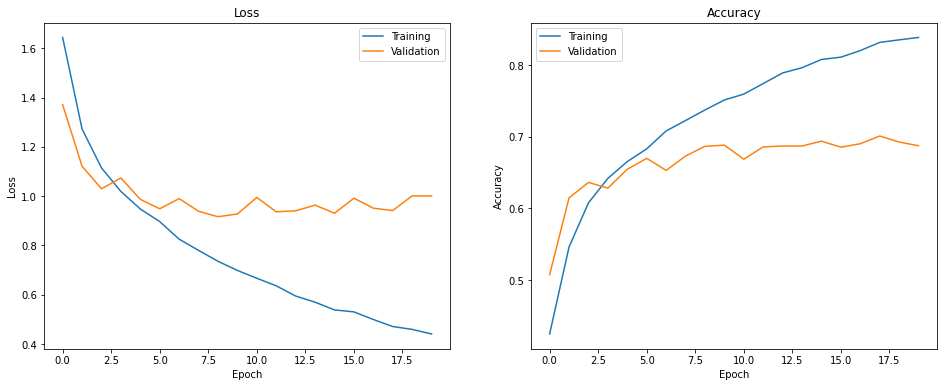

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')

Next we will evaluate our trained network on the test and training data.

In [ ]:
# IPython notebook just prints out the returned values - loss and accuracy
model.evaluate(X_test_norm, y_test)

10000/10000 [==============================] - 1s 111us/step


[1.022902066230774, 0.6779999732971191]

In [ ]:
# the same for training set
model.evaluate(X_train_norm, y_train)

25000/25000 [==============================] - 3s 107us/step


[0.2338684863615036, 0.9444000124931335]

Based on the training and test accuracy, is the trained network good?

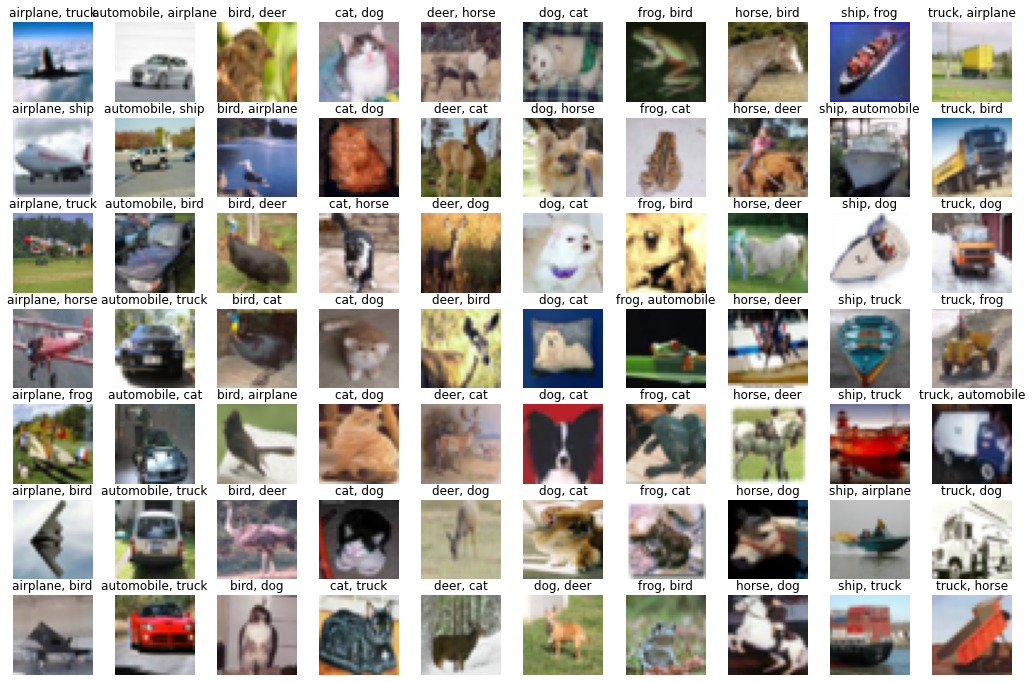

In [ ]:
test_predicted = np.argmax(model.predict(X_test_norm), axis=1)

plt.rcParams['figure.figsize'] = (18.0, 12.0) # set default size of plots
# "Names" of classes:
classes = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes = len(classes)
samples_per_class = 7 # Number of images from each class we want to see
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_test == y)   

    misclas_idxs = np.flatnonzero(np.array(test_predicted)[idxs] != y)

    if samples_per_class < len(misclas_idxs):
      misclas_idxs = np.random.choice(misclas_idxs, samples_per_class, replace=False)
    
    for i, idx in enumerate(misclas_idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_test[idxs[idx]].reshape((32, 32, 3)), plt.get_cmap('gray'))
        plt.axis('off')
        plt.title(str(classes[y]) + ", " + str(classes[np.array(test_predicted)[idxs[idx]]]))
plt.show()

## Homework exercise 2 (2 points): adding and subtracting layers in Keras
<font color='red'> Sometimes you may want to experiment with the number of layers in your network. Adding or subtracting layers is one of the simplest ways to reduce overfitting or improve the performance of your model. Here we will practice adding and remove layers in Keras (feel the difference with pure Python). </font>

<font color='red'> **(Homework exercise 2- a)** Copy paste to cell below the initial CNN model created for CIFAR10. Next, remove the second Conv2D + BatchNorm + ReLu block and train this smaller network on the same data (make sure to correctly link the layers in the model). Visualise the learning curves. **(1 point)** </font>

In [ ]:
##### YOUR CODE STARTS #####
x = Input(shape=(32, 32, 3))

c1 = Conv2D(32, (3, 3), strides=(1, 1), padding="same")(x)
b1 = BatchNormalization()(c1)
a1 = Activation('relu')(b1)
p1 = MaxPooling2D(pool_size=2)(a1)
d1 = Dropout(rate=0.25)(p1)

f1 = Flatten()(d1) # tensor into vector

h2 = Dense(100)(f1)
b2 = BatchNormalization()(h2)
a2 = Activation('relu')(b2)
d2 = Dropout(rate=0.5)(a2)

z = Dense(10)(d2)
p = Activation('softmax')(z)
##### YOUR CODE ENDS ##### (please do not delete this line)

In [ ]:
smaller_model = Model(inputs=x, outputs=p)
smaller_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
smaller_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0   

In [ ]:
# Fit the model; returns History object
history_smaller = smaller_model.fit(X_train_norm, y_train, batch_size=64, epochs=20, validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 [==============================] - 3s 135us/step - loss: 1.7125 - accuracy: 0.4003 - val_loss: 1.3592 - val_accuracy: 0.5168
Epoch 2/20
22500/22500 [==============================] - 3s 118us/step - loss: 1.3469 - accuracy: 0.5175 - val_loss: 1.1695 - val_accuracy: 0.5920
Epoch 3/20
22500/22500 [==============================] - 3s 124us/step - loss: 1.2253 - accuracy: 0.5663 - val_loss: 1.1188 - val_accuracy: 0.6088
Epoch 4/20
22500/22500 [==============================] - 3s 122us/step - loss: 1.1389 - accuracy: 0.5949 - val_loss: 1.0786 - val_accuracy: 0.6196
Epoch 5/20
22500/22500 [==============================] - 3s 117us/step - loss: 1.0922 - accuracy: 0.6153 - val_loss: 1.0429 - val_accuracy: 0.6296
Epoch 6/20
22500/22500 [==============================] - 3s 123us/step - loss: 1.0341 - accuracy: 0.6349 - val_loss: 1.0297 - val_accuracy: 0.6320
Epoch 7/20
22500/22500 [==============================] - 3s 12

Text(0.5, 1.0, 'Accuracy')

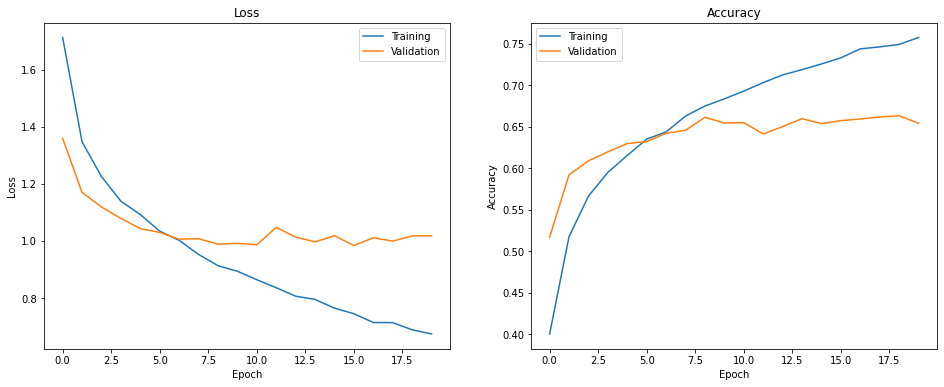

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history_smaller.history['loss'])
plt.plot(history_smaller.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_smaller.history['accuracy'])
plt.plot(history_smaller.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')

In [ ]:
smaller_model.evaluate(X_train_norm, y_train)

25000/25000 [==============================] - 2s 90us/step


[0.4070424026679993, 0.8887199759483337]

In [ ]:
smaller_model.evaluate(X_test_norm, y_test)

10000/10000 [==============================] - 1s 91us/step


[1.0277146659851075, 0.6539000272750854]

<font color='red'> **(Homework exercise 2- b)** Now make a bigger version of the same network, by adding additional Conv2D + BatchNorm + ReLu block. So you should have three Conv2D + BatchNorm + ReLu blocks now. Next train it and visualise learning curves **(0.5 points)**. </font>

In [ ]:
##### YOUR CODE STARTS #####
x = Input(shape=(32, 32, 3))

#First Convolutional Block
c1 = Conv2D(32, (3, 3), strides=(1, 1), padding="same")(x)
b1 = BatchNormalization()(c1)
a1 = Activation('relu')(b1)

# Second Convolutional Block
c2 = Conv2D(32, (3, 3), strides=(1, 1), padding="valid")(a1)
b2 = BatchNormalization()(c2)
a2 = Activation('relu')(b2)

# Third Convolutional Block
c3 = Conv2D(32, (3, 3), strides=(1, 1), padding="valid")(a2)
b3 = BatchNormalization()(c3)
a3 = Activation('relu')(b3)
p3 = MaxPooling2D(pool_size=2)(a3)
d3 = Dropout(rate=0.25)(p3)

f3 = Flatten()(d3) # tensor into vector

h4 = Dense(100)(f3)
b4 = BatchNormalization()(h4)
a4 = Activation('relu')(b4)
d4 = Dropout(rate=0.5)(a4)
z = Dense(10)(d4)
p = Activation('softmax')(z)
##### YOUR CODE ENDS ##### (please do not delete this line)

In [ ]:
bigger_model = Model(inputs=x, outputs=p)
bigger_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
bigger_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 30, 30, 32)        0   

In [ ]:
# Fit the model; returns History object
history_bigger = bigger_model.fit(X_train_norm, y_train, batch_size=64, epochs=20, validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 [==============================] - 5s 228us/step - loss: 1.6258 - accuracy: 0.4188 - val_loss: 1.3058 - val_accuracy: 0.5400
Epoch 2/20
22500/22500 [==============================] - 4s 193us/step - loss: 1.2445 - accuracy: 0.5565 - val_loss: 1.0600 - val_accuracy: 0.6272
Epoch 3/20
22500/22500 [==============================] - 4s 190us/step - loss: 1.0921 - accuracy: 0.6138 - val_loss: 1.0867 - val_accuracy: 0.6092
Epoch 4/20
22500/22500 [==============================] - 4s 193us/step - loss: 0.9900 - accuracy: 0.6525 - val_loss: 0.9485 - val_accuracy: 0.6696
Epoch 5/20
22500/22500 [==============================] - 4s 191us/step - loss: 0.9215 - accuracy: 0.6737 - val_loss: 0.9480 - val_accuracy: 0.6736
Epoch 6/20
22500/22500 [==============================] - 4s 194us/step - loss: 0.8548 - accuracy: 0.6981 - val_loss: 1.0063 - val_accuracy: 0.6632
Epoch 7/20
22500/22500 [==============================] - 4s 18

Text(0.5, 1.0, 'Accuracy')

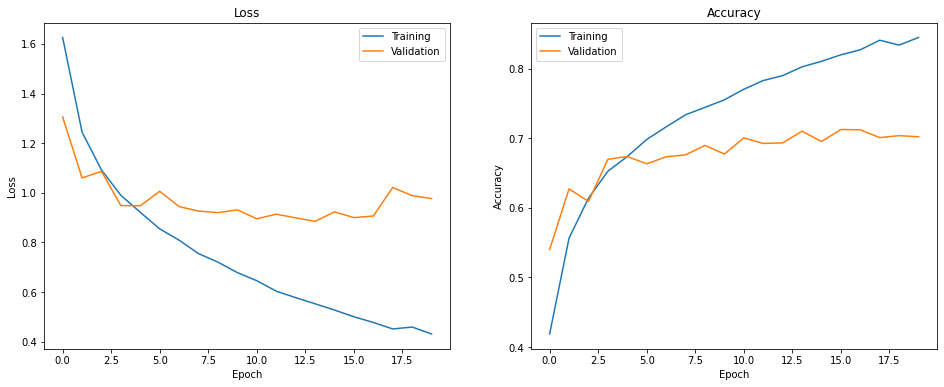

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bigger.history['loss'])
plt.plot(history_bigger.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_bigger.history['accuracy'])
plt.plot(history_bigger.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')

In [ ]:
bigger_model.evaluate(X_train_norm, y_train)

25000/25000 [==============================] - 3s 116us/step


[0.23985144098758698, 0.9376800060272217]

In [ ]:
bigger_model.evaluate(X_test_norm, y_test)

10000/10000 [==============================] - 1s 115us/step


[1.0098003799438477, 0.6833999752998352]

<font color='red'> **(Homework exercise 2- c)** Compare learning curves for smaller and bigger versions and say which version has overfitted the data more significantly? Why do you think so? Which network you would run in production? **(0.5 points)**. </font>

Answer to **(c)**: Both of the two graphs show us that bigger model overfitted the data more significantly.Also the overfitting is much bigger for the loss function graph than for the accuracy graph(smaller model has an accuracy difference of around 0.1, the bigger model has between 0.1-0.15, for the loss function the difference is around 0.3 vs 0.6).

The reason for overfit is not surprising since with 2 extra layers the bigger model got more complex and was able to capture the specifics of the training set more. This made the bigger model a better classifier for the training set than the smaller model, but it also became less generalizable for the unseen validation data.

I would have said that the smaller model is a better choice for production, yet if we look at the test scores for the bigger and smaller models, we see that the former one surpasses the latter(accuracy scores are 0.68 for bigger model 0.65 for the smaller model). Because of this, I don't want to be assertive here. While it is preferable to deploy a leaner model to save from computation, in some cases a small increase in accuracy that comes with a bigger model is what we want.

## CNN on MNIST
Let's use one of the convolutional neural networks we defined above to classify MNIST.

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

X_train = np.reshape(mnist.train.images, (55000, 28, 28, 1))
y_train = np.reshape(mnist.train.labels, (55000, 1))
print(f"Train images are of shape: {X_train.shape} and labels: {y_train.shape}")

X_test = np.reshape(mnist.test.images, (10000, 28, 28, 1))
y_test = np.reshape(mnist.test.labels, (10000, 1))
print(f"Test images are of shape: {X_test.shape} and labels: {y_test.shape}")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Train images are of shape: (55000, 28, 28, 1) and labels: (55000, 1)
Test images are of shape: (10000, 28, 28, 1) and labels: (10000, 1)


Copy and paste below one of the convolutional neural networks we have defined previously.


NB! Make sure the input shape is correct (recall that MNIST is 28x28x1 not 32x32x3 as CIFAR10).

In [ ]:
##### YOUR CODE STARTS #####
x = Input(shape=(28, 28, 1))

# first conv block
c1 = Conv2D(32, (3, 3), strides=(1, 1), padding="same")(x)
b1 = BatchNormalization()(c1)
a1 = Activation('relu')(b1)

# second conv block 
c2 = Conv2D(32, (3, 3), strides=(1, 1), padding="valid")(a1)
b2 = BatchNormalization()(c2)
a2 = Activation('relu')(b2)
p2 = MaxPooling2D(pool_size=2)(a2)
d2 = Dropout(rate=0.25)(p2)

f2 = Flatten()(d2) # tensor into vector
h3 = Dense(100)(f2)
b3 = BatchNormalization()(h3)
a3 = Activation('relu')(b3)
d3 = Dropout(rate=0.5)(a3)
z = Dense(10)(d3)
p = Activation('softmax')(z)
##### YOUR CODE ENDS ##### (please do not delete this line)

Compile and train your model, keep the record of loss in the `history` variable.

In [ ]:
##### YOUR CODE STARTS #####
model = Model(inputs = x, outputs = p)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.1)
##### YOUR CODE ENDS ##### (please do not delete this line)

Train on 49500 samples, validate on 5500 samples
Epoch 1/20
49500/49500 [==============================] - 5s 101us/step - loss: 0.2530 - accuracy: 0.9313 - val_loss: 0.9832 - val_accuracy: 0.6658
Epoch 2/20
49500/49500 [==============================] - 4s 86us/step - loss: 0.0978 - accuracy: 0.9725 - val_loss: 0.0414 - val_accuracy: 0.9882
Epoch 3/20
49500/49500 [==============================] - 4s 88us/step - loss: 0.0781 - accuracy: 0.9769 - val_loss: 0.0446 - val_accuracy: 0.9865
Epoch 4/20
49500/49500 [==============================] - 4s 85us/step - loss: 0.0622 - accuracy: 0.9815 - val_loss: 0.0386 - val_accuracy: 0.9889
Epoch 5/20
49500/49500 [==============================] - 4s 87us/step - loss: 0.0535 - accuracy: 0.9832 - val_loss: 0.0538 - val_accuracy: 0.9849
Epoch 6/20
49500/49500 [==============================] - 4s 88us/step - loss: 0.0491 - accuracy: 0.9854 - val_loss: 0.0338 - val_accuracy: 0.9898
Epoch 7/20
49500/49500 [==============================] - 4s 89us/st

Visualise the training and validation accuracy and loss dynamics over epochs.

Text(0.5, 1.0, 'Accuracy')

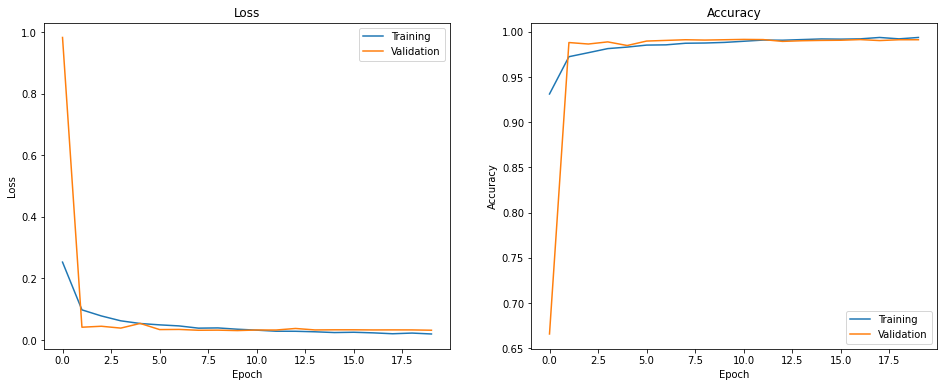

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')

Does our network overfit? Does it have enough power to solve the problem?

Evaluate model on test images

In [ ]:
# IPython notebook just prints out the returned values - loss and accuracy
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 85us/step


[0.027417399051227948, 0.9911999702453613]

Here we visualise misclassified examples for CNN on MNIST dataset: 

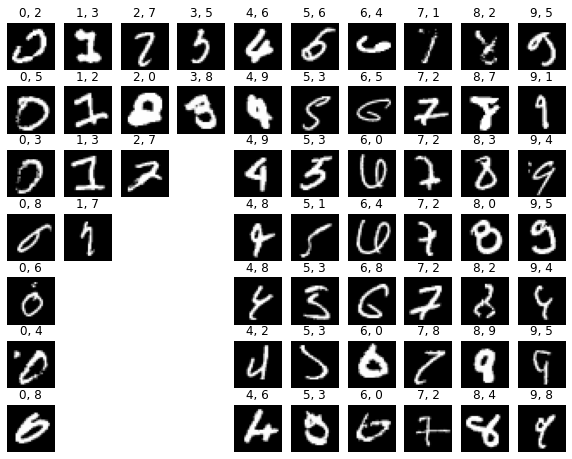

In [ ]:
test_predicted = np.argmax(model.predict(X_test), axis=1)

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
# "Names" of classes:
classes =  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

num_classes = len(classes)
samples_per_class = 7 # Number of images from each class we want to see
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_test == y)   

    misclas_idxs = np.flatnonzero(np.array(test_predicted)[idxs] != y)

    if samples_per_class < len(misclas_idxs):
      misclas_idxs = np.random.choice(misclas_idxs, samples_per_class, replace=False)
    
    for i, idx in enumerate(misclas_idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_test[idxs[idx]].reshape((28, 28)), plt.get_cmap('gray'))
        plt.axis('off')
        plt.title(str(y) + ", " + str(np.array(test_predicted)[idxs[idx]]))
plt.show()

Do misclassifications look reasonable? 

# Fast.ai library

What is [fast.ai](https://docs.fast.ai/)?

Basically fast.ai is Keras on top of Pytorch that uses cutting edge research in Deep Learning.

**Why to introduce yet another library for DL in this class?**
* want to mention fast.ai online course which is great (it does not require you to use fast.ai library)
* image scraping exercise in the end of this class 
* fast.ai are usually the first to implement SOTA techniques (e.g. learning rate finder), and thus thier library usually provides cutting edge results in many domains

**Bad things about fast.ai (why my team don't use fast.ai):**
* if you want to change something or apply fast.ai in a custom way to custom data, the chances are high - it is going to be painful, why? ->
* the documentation is really bad, unless you are Jeremy Howard who has written it

## fast.ai on CIFAR10

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

path = untar_data(URLs.CIFAR); path #it says just CIFAR, but since there is CIFAR_100, I hope that this is CIFAR10
data = ImageDataBunch.from_folder(path, valid_pct = 0.1, size=48)
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(3)

## fast.ai on MNIST

In [ ]:
path = untar_data(URLs.MNIST); path
data = ImageDataBunch.from_folder(path, valid_pct=.1, size=48)
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

## Creating your own dataset using fast.ai
*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

### Get a list of URLs

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>j</kbd> on Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, and a small window the javascript 'Console' will appear. In Firefox press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> on Windows/Linux or <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

After both files are downloaded and renamed, upload them to colab by running the following command

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Orangutans.csv to Orangutans.csv


In [ ]:
!ls

Orangutans.csv	sample_data


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Chimps.csv to Chimps.csv


In [ ]:
!ls

Chimps.csv  Orangutans.csv  sample_data


### Create directory and upload urls file into your server
Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.

In [ ]:
folder = 'leopards'
file = 'leopards.csv'

In [ ]:
path = Path('data/cats')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
folder = 'jaguars'
file = 'jaguars.csv'

In [ ]:
path = Path('data/cats')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
path.ls()

## Download images
Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

In [ ]:
folder = 'leopards'
dest = path/folder
download_images('leopards.csv', dest, max_pics=400)

In [ ]:
folder = 'jaguars'
dest = path/folder
download_images('jaguars.csv', dest, max_pics=400)

In [ ]:
classes = ['leopards','jaguars']

Then we can remove any images that can't be opened:

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

## View data

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

## Train model

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(5)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
!ls $path/'leopards'/

In [ ]:
img = open_image(path/'jaguars'/'00000011.jpg')
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Get a url on the jaguar image from internet and insert it below

In [ ]:
from urllib.request import urlopen

img = open_image(urlopen('https://i.ytimg.com/vi/1qfTzj70GGk/maxresdefault.jpg'))
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

In [ ]:
img = open_image(urlopen('https://i.pinimg.com/originals/2a/0b/ef/2a0bef9af781bef4398eee50a49a7023.jpg'))
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

## Homework exercise 3 (4 points): Create your own dataset and build a CNN model using fast.ai API
<font color='red'> In this exercise, you have a chance to test if CNN can distinguish between images of your favourite objects. </font>

<font color='red'> **(Homework exercise 3- a)** Create your own dataset with two or more classes using the same approach we used in the class to construct the dataset of wild cats. But this time choose classes yourself. **(1 point)** </font>

In [ ]:
##### YOUR CODE STARTS #####
from google.colab import files
uploaded = files.upload()
!ls

folder = 'gorillas'
file = 'gorillas.csv'
path = Path('data/furries')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

folder = 'orangutans'
file = 'orangutans.csv'
path = Path('data/furries')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

print(path.ls())

folder = 'gorillas'
dest = path/folder
download_images('gorillas.csv', dest, max_pics=400)

folder = 'orangutans'
dest = path/folder
download_images('orangutans.csv', dest, max_pics=400)

classes = ['gorillas','orangutans']
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)


##### YOUR CODE ENDS ##### (please do not delete this line)

Saving orangutans.csv to orangutans (1).csv
Saving gorillas.csv to gorillas (1).csv
 data		     gorillas.csv	   orangutans.csv
'gorillas (1).csv'  'orangutans (1).csv'   sample_data
[PosixPath('data/furries/gorillas'), PosixPath('data/furries/orangutans')]


gorillas


orangutans


Test that data is correctly formatted and accessible by running the following lines:

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['gorillas', 'orangutans']

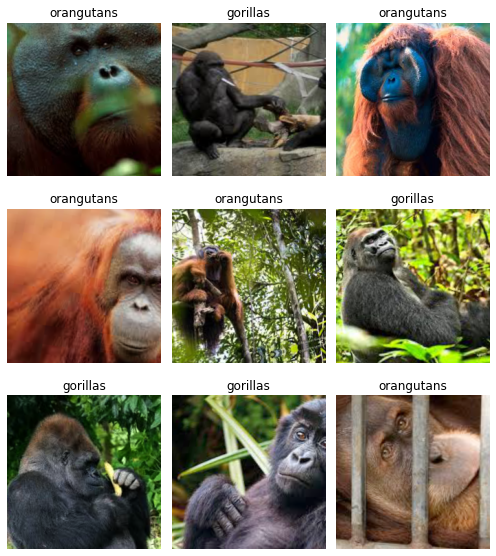

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['gorillas', 'orangutans'], 2, 515, 128)

In [ ]:
data.train_ds.y

CategoryList (515 items)
gorillas,gorillas,gorillas,gorillas,gorillas
Path: data/furries

<font color='red'> **(Homework exercise 3- b)** train a neural network on images you have acquired **(0.5 points)** </font>

In [ ]:
##### YOUR CODE STARTS #####
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(5)
##### YOUR CODE ENDS ##### (please do not delete this line)

Plot the confusion matrix to make sure that you model has learned something:

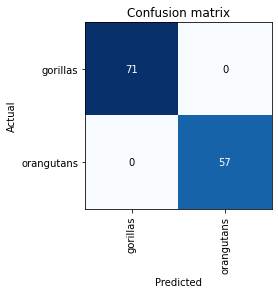

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

<font color='red'> **(Homework exercise 3- c)** Test your model on one or more images from the internet that represent classes you have chosen, but unlikely to be in the training data (you can change your search query). **(0.5 points)** </font>

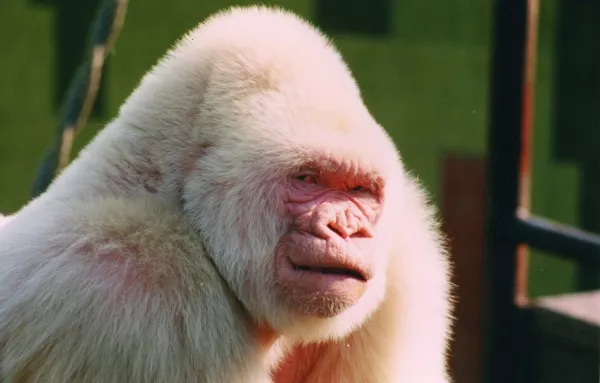

In [ ]:
##### YOUR CODE STARTS #####
from urllib.request import urlopen

img = open_image(urlopen('https://cdn.mos.cms.futurecdn.net/ubQsoWY8KwYmZgPE6K8dZC-970-80.jpg.webp'))
img
##### YOUR CODE ENDS ##### (please do not delete this line)

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
data.classes[int(pred_class)]

'gorillas'

In [ ]:
outputs

tensor([0.7078, 0.2922])

# Bonus exercises
*(NB, these are optional exercises!)*

## Bonus exercise 1 (3 bonus points):

<font color='red'> Take `RandomForestClassifier` or some other model from sklearn package and apply it to the spiral data from the homework exercise 1. Visualise trained algorithm the same way as we have visualised neural networks (by changing the `plot_neural_network` function). Compare your model and the 2-layer or 3-layer neural network. How different are the performances? How different are the decision boundaries? Why? </font> 

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix

Accuracy:
0.995
f1 Score:
0.9949748743718593


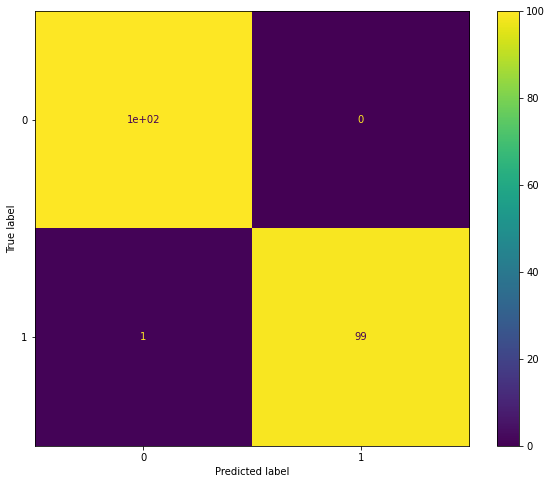

In [47]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X, y)
preds = clf.predict(X)

print('Accuracy:')
print(accuracy_score(y, preds))

print('f1 Score:')
print(f1_score(y, preds))

plot_confusion_matrix(clf, X, y)
plt.show()

In [49]:
def plot_random_forest(X, y):
  h = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  fig = plt.figure()
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=120, edgecolors = 'white', cmap=plt.cm.Spectral)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

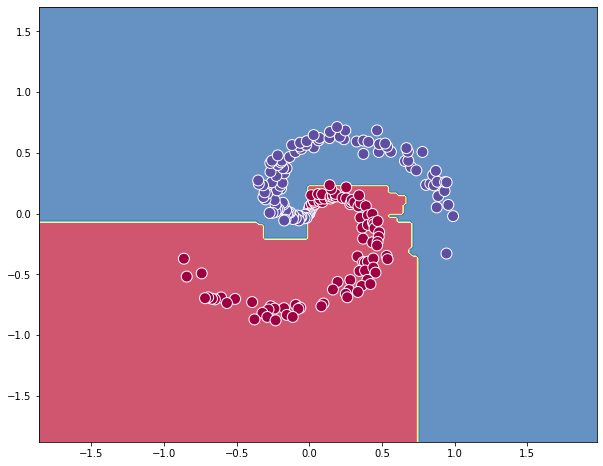

In [51]:
plot_random_forest(X, y)

The performances are very similar, but using random forest with maximum depth equal to 10 proved slighlty better than our 3 layer neural network with an accuracy of 0.995(vs 0.98, the accuracy that of the neural network). Besides that, we see that random forest's confusion matrix results were also good, it only had 1 false negative and 0 false negatives.

Interpreting the reason behind this small difference in accuracy is a bit difficult for me since both of the models' performances are very similar. My guess is that a random forest consisting of a 100 decision trees with every tree having a max_depth of 10 proves to be a bit more complex than the neural network with only three layers. But this is just a guess, and it is better to try those two models on a test set to decide which model beats the another.

There is also a difference with regards to shape between the decision boundaries. Since a random forest is made up of decision trees, it has a cutoff value for the two features that were used for classification. This causes the decision boundaries to be parallel to x and y coordinates above, which implies that after the certain cutoff value for any of the features, the class was determined to be blue or red. On the other hand, a neural network classifies the data via a complex non-linear function, which -eventually- results in a polynomial shape for the decision boundary.



# Comments (optional feedback to the course instructors)
Here, please, leave your comments regarding the homework, possibly answering the following questions: 
* how much time did you spend on this homework?
* was it too hard/easy for you?
* what would you suggest to add or remove?
* anything else you would like to tell us

Your comments:

# References
* A very large part of this notebook has been inspired by http://cs231n.github.io/neural-networks-case-study/ developed by karpathy@cs.stanford.edu.
* CIFAR10 part of this practice has been inspired by the Machine Learning course taught at the University of Tartu by Meelis Kull (https://courses.cs.ut.ee/2019/ml/fall)
* Fast.ai part has been copied from https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb. My general recommendation for everyone intersted in Deep Learning (not only in fast.ai library) to take fast.ai  online course for coders: https://course.fast.ai/ developed by Jeremy Howard et al.